### Grading
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** 

### Validate Button
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. 

You do not need to use the Validate button for this lab since there are no auto-graded components. If you hit the Validate button, it will time out given the number of visualizations in the notebook. Cells with longer execution times cause the validate button to time out and freeze. ***This notebook's Validate button time-out does not affect the final submission grading.*** 

# Clustering RNA sequences to identify cancer types

In this assignment, we will use clustering algorithms on RNA sequence data to identify cancer types.
Since the [whole data](https://www.synapse.org/#!Synapse:syn4301332) (from [Cancer Genome Atlas Pan-Cancer project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)) is very big, we will use a [subset data from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). The subset data contains only 5 labels; BRCA, KIRC, COAD, LUAD and PRAD. The meanings of those labels are as below.

|Abbreviation|Cancer|
|:----:|:-------:|
|LUSC|Lung squamous cell carcinoma |
|READ |Rectum adenocarcinoma |
|GBM |Glioblastoma multiforme|
|BLCA |Bladder Urothelial Carcinoma|
|UCEC |Uterine Corpus Endometrioid Carcinoma|
|COAD |Colon adenocarcinoma|
|OV |Ovarian serous cystadenocarcinoma|
|LAML |Acute Myeloid Leukemia|
|HNSC |Head and Neck squamous cell carcinoma|
|LUAD |Lung adenocarcinoma|
|BRCA |Breast invasive carcinoma|
|KIRC |Kidney renal clear cell carcinoma|

Although we can use the data for supervised learning model training, we will not use these labels for training, but use them for evaluation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [3]:
# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

### A. [Peer Review] Perform basic data inspection or EDA on the pandas dataframe.
- How many observations?
- How many features?

In [36]:
# perform basic data inspection such as getting the number of observations and number of features
# you can also display part of the dataframe or run data.info() 
# your code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#using PCA to reduce dimension
# scaler=StandardScaler()
# scaled_data = scaler.fit_transform(data)
# pca = PCA()
# pca.fit(scaled_data)
# cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
# target_var_095 = 0.95
# num_comp_95 = np.argmax(cum_exp_var >= target_var_095) + 1  
# target_var_090 = 0.90
# num_comp_90 = np.argmax(cum_exp_var >= target_var_090) + 1  

# print(f"Number of components for 90% variance: {num_comp_90}")
# print(f"Number of components for 95% variance: {num_comp_95}")

# pca_90 = PCA(n_components=num_comp_90)
# reduced_data_90 = pca_90.fit_transform(scaled_data)

# pca_95 = PCA(n_components=num_comp_95)
# reduced_data_95 = pca_95.fit_transform(scaled_data)

# # print(f"Shape of reduced data (90%): {reduced_data.shape}")
# print(f"Shape of reduced data (95%): {reduced_data_95.shape}")


# from sklearn.manifold import TSNE
# import seaborn as sns

# tsne = TSNE(n_components=2, perplexity=30,
#     n_iter=5000, random_state=100)
# tsne_results = tsne.fit_transform(reduced_data)

# plt.figure(figsize=(8, 8))
# sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
# plt.title('t-SNE Visualization')
# plt.show()

# wcss = []  
# max_k = 10
# for i in range(1, max_k + 1):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(data)
#     wcss.append(kmeans.inertia_)

# plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
# plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('WCSS (Inertia)')
# plt.grid(True)  # Add a grid for easier reading
# plt.xticks(range(1, max_k + 1)) #Ensure all k values are shown.
# plt.show()

mean_values = data.mean()
max_values = data.max()
min_values = data.min()
zeros_in_mean = (mean_values == 0).sum()
zeros_in_max = (max_values == 0).sum()
zeros_in_min = (min_values == 0).sum()
print(f"Number of zeros in mean values: {zeros_in_mean}")
print(f"Number of zeros in max values: {zeros_in_max}")
print(f"Number of zeros in min values: {zeros_in_min}")

print(f"number of observation: {data.shape[0]-1}")
print(f"number of features: {data.shape[1]}")
print("----- data ------")
print(f"data.info: {data.info}")
print("----- label ------")
print(f"label.info: {label.info}")

Number of zeros in mean values: 267
Number of zeros in max values: 267
Number of zeros in min values: 8175
number of observation: 800
number of features: 20531
----- data ------
data.info: <bound method DataFrame.info of      gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.3186

- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What do those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br>
Answer the Peer Review question about this section. 

mean_values = gene_0         0.026642
gene_1         3.010909
gene_2         3.095350
gene_3         6.722305
gene_4         9.813612
                ...    
gene_20526    11.742228
gene_20527    10.155271
gene_20528     9.590726
gene_20529     5.528177
gene_20530     0.095411
Length: 20531, dtype: float64
max_values = gene_0         1.482332
gene_1         6.237034
gene_2         6.063484
gene_3        10.129528
gene_4        11.355621
                ...    
gene_20526    13.715361
gene_20527    11.675653
gene_20528    12.813320
gene_20529    11.205836
gene_20530     5.254133
Length: 20531, dtype: float64
min_values = gene_0        0.000000
gene_1        0.000000
gene_2        0.000000
gene_3        5.009284
gene_4        8.435999
                ...   
gene_20526    9.045255
gene_20527    7.530141
gene_20528    7.864533
gene_20529    0.593975
gene_20530    0.000000
Length: 20531, dtype: float64


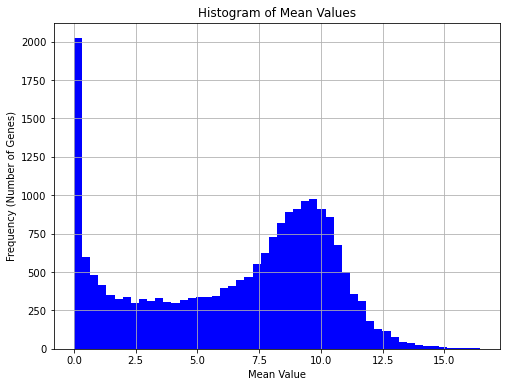

Range of Mean Values: [0.0 : 16.430441642060657]


In [37]:
# draw histograms of mean, max and min values in each feature 
# your code here

# zeros_in_mean = (mean_values == 0).sum()
# zeros_in_max = (max_values == 0).sum()
# zeros_in_min = (min_values == 0).sum()
# print(f"Number of zeros in mean values: {zeros_in_mean}")
# print(f"Number of zeros in max values: {zeros_in_max}")
# print(f"Number of zeros in min values: {zeros_in_min}")
# plt.subplot(2, 3, 4)
# plt.boxplot(mean_values, vert=False)
# plt.title('Box Plot of Mean Values')
# plt.xlabel('Mean Value')

# plt.subplot(2, 3, 5)
# plt.boxplot(max_values, vert=False)
# plt.title('Box Plot of Max Values')
# plt.xlabel('Mean Value')


# plt.subplot(2, 3, 6)
# plt.boxplot(min_values, vert=False)
# plt.title('Box Plot of Min Values')
# plt.xlabel('Mean Value')


mean_values = data.mean()
max_values = data.max()
min_values = data.min()
# mean_values = reduced_data_95.mean()
# max_values = reduced_data_95.max()
# min_values = reduced_data_95.min()

# print(f"mean_values = {mean_values}")
# print(f"max_values = {max_values}")
# print(f"min_values = {min_values}")
plt.figure(figsize=(8, 6))

# plt.subplot(2, 3, 1)
plt.hist(mean_values, bins=50, color='blue')
plt.title('Histogram of Mean Values')
plt.xlabel('Mean Value')
plt.ylabel("Frequency (Number of Genes)")
# plt.tight_layout()
plt.grid(True)
plt.show()
print(f"Range of Mean Values: [{mean_values.min()} : {mean_values.max()}]")

# plt.subplot(2, 3, 2)

plt.figure(figsize=(12, 6))
plt.hist(max_values, bins=50, color='red')
plt.title('Histogram of Max Values')
plt.xlabel('Mean Value')
plt.ylabel("Frequency (Number of Genes)")
plt.tight_layout()
plt.grid(True)
plt.show()
# print(f"Range of Max Values: [{max_values.min()} : {max_values.max()}]")

# # # plt.subplot(2, 3, 3)
# plt.figure(figsize=(12, 6))
# plt.hist(min_values, bins=50, color='green')
# plt.title('Histogram of Min Values')
# plt.xlabel('Mean Value')
# plt.ylabel("Frequency (Number of Genes)")
# plt.tight_layout()
# plt.grid(True)
# plt.show()
# print(f"Range of Min Values: [{min_values.min()} : {min_values.max()}")

# plt.tight_layout()
# plt.show()



- If we were to train a "supervised" learning model, how would you deal with such large feature dimension? 
- Even after feature dimension reduction, still the number of useful features may be enormous. How it would impact performance or runtime of certain supervised learning algorithms? Which algorithms would suffer from high dimension features than others and why? 
- How it would impact performance or runtime of an unsupervised learning algorithm?
- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br> <br>
Anwer these questions in this week's Peer Review assignment. 

### B. [Peer Review] Build a hierarchical clustering model
Let's build a model using hierarchical clustering. Hierarchical clustering module is available from `sklearn.cluster.AgglomerativeClustering`. You can choose linkage type and metric. Please check its documentation for more details.

**a) Number of clusters vs distance threshold**
Oftentimes hierarchical clustering does not need to know the number of clusters in advance. Instead, one needs to choose threshold distance/similarity to cut the dendrogram later. The AgglomerativeClustering module lets you specify either the number of clusters (n_clusters) or the threshold (distance_threshold). Based on our data, which should we choose to set to which value and why? <br> <br>
Answer this question in the Peer Review assignment. 

#### b) Guess which metric?
Can you guess which metric to use (distance-based vs. similarity-based) and why? 
This question is not graded, but we encourage you to share your thoughts with the class. See the ungraded discussion prompt for this week's material. 

#### c) Build a model
Build a model using n_clusters=5 option. Choose any metric and linkage type at first. Display the clustering result labels (you can just print out the result). Do not change the variable (model) name. Answer the question about this section in the Peer Review.

In [33]:
from sklearn.metrics import pairwise_distances

# build a model using n_clusters=5 option
model=None
# your code here

model = AgglomerativeClustering(n_clusters=5, linkage="complete", affinity="euclidean")
model.fit(data)
print("Cluster labels:", model.labels_)


Cluster labels: [4 3 1 4 1 4 0 4 1 4 1 0 4 2 1 1 3 0 0 4 1 0 3 1 0 3 2 1 1 1 1 1 0 3 4 1 0
 3 1 3 0 4 4 0 0 1 4 2 1 3 1 3 1 4 2 1 1 3 0 1 3 0 1 3 4 2 1 4 0 1 0 1 1 3
 1 3 1 0 4 2 1 4 1 1 4 4 1 1 0 1 4 4 1 3 1 4 2 1 4 1 1 0 1 0 3 0 3 3 3 3 4
 1 3 4 1 0 0 0 1 1 3 0 3 1 4 4 4 1 0 1 2 1 2 1 1 0 3 1 0 2 1 4 1 0 3 2 4 1
 3 3 3 3 1 1 3 1 1 4 4 3 4 3 0 1 4 3 2 0 3 1 0 3 1 3 1 1 1 4 1 0 2 0 1 4 4
 4 3 3 1 3 3 0 3 4 3 1 3 1 3 3 1 0 0 0 0 4 2 4 1 3 3 1 4 1 4 1 1 1 3 1 0 3
 0 0 3 1 0 4 1 3 3 4 2 2 0 4 0 3 1 0 0 3 4 4 3 3 0 1 1 2 1 4 3 1 4 0 4 4 4
 1 3 2 3 2 3 4 3 1 1 0 0 1 2 4 0 4 1 1 0 1 1 1 2 3 3 1 1 1 0 0 0 0 3 1 1 0
 1 1 3 4 1 1 2 3 4 1 1 1 2 1 4 1 2 3 3 4 0 1 0 0 3 3 0 1 1 1 3 0 1 1 4 3 0
 1 3 4 0 1 4 2 1 1 1 3 3 3 1 1 4 3 1 0 1 2 3 3 1 0 1 1 1 2 3 2 0 4 0 1 1 0
 3 2 4 3 4 3 0 4 1 2 0 0 2 2 4 1 3 3 0 3 4 1 1 1 3 3 0 3 3 0 2 4 1 3 4 1 2
 1 3 1 1 4 1 4 2 1 3 1 1 3 1 1 1 0 3 4 1 4 0 1 0 2 1 4 3 0 1 1 0 1 3 3 1 4
 2 1 0 3 4 1 4 1 1 1 1 0 3 1 0 1 1 3 3 0 3 4 2 1 0 0 1 4 0 3 3 3 1 4 4 1 4
 3 0 4 1 

#### d) Label permuation
In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily. Write a function below to find best matching label ordering based on the accuracy. Do not change the variable names. Answer the question about this section in the Peer Review. 

In [34]:
import itertools

# data = pd.read_csv('data/data.csv')
# label = pd.read_csv('data/labels.csv')
# data=data.drop('Unnamed: 0',axis=1)
# label=label.drop('Unnamed: 0',axis=1)
# model = AgglomerativeClustering(n_clusters=5, linkage="ward", affinity="euclidean")
# model.fit(data)



def label_permute_compare(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
# your code here
    # get an unique mapping from cancer type label to numeric, and then convert true label to numeric order
    label_mapping = {label: i for i, label in enumerate(ytdf['Class'].unique())}
    true_labels_order = ytdf['Class'].map(label_mapping).to_numpy()
        
    best_order =None
    best_accuracy = -1
    
    # go thru different permutation predicted label order, and then compare with true label order
    for perm in itertools.permutations(range(n)):
        remapped_labels = np.array([perm[label] for label in yp])
        accuracy = np.mean(remapped_labels == true_labels_order)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_label_order = perm

    return best_label_order, best_accuracy




In [35]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

(3, 2, 4, 1, 0) 0.9313358302122348


#### e) Check confusion matrix
Use sklearn's confusion matrix and display the results. Answer the Peer Review question about this section.  

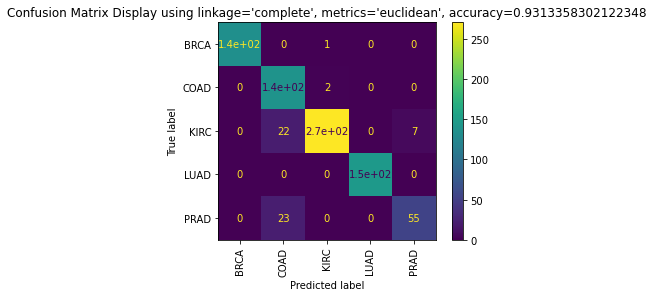

In [29]:
# display confusion matrix here 
# your code here
from sklearn.metrics import ConfusionMatrixDisplay

best_predicted_labels_order = np.array([labelorder[label] for label in model.labels_])
label_mapping = {label: i for i, label in enumerate(label['Class'].unique())}
true_labels_order = label['Class'].map(label_mapping).to_numpy()

cm = confusion_matrix(true_labels_order, best_predicted_labels_order)
class_names = sorted(label['Class'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title(f"Confusion Matrix Display using linkage='complete', metrics='euclidean', accuracy={acc}")
plt.show()




#### f) Change linkage method and distance metric. Which ones lead the best performance? Print out the accuracy and confusion matrix for the best model.
<br> Answer the Peer Review questions about this section. 

linkage:ward, 	metric:euclidean, 	accuracy: 0.9950062421972534
linkage:complete, 	metric:euclidean, 	accuracy: 0.9313358302122348
linkage:complete, 	metric:manhattan, 	accuracy: 0.7228464419475655
linkage:complete, 	metric:cosine, 	accuracy: 0.7403245942571786
linkage:complete, 	metric:l1, 	accuracy: 0.7228464419475655
linkage:complete, 	metric:l2, 	accuracy: 0.9313358302122348
linkage:complete, 	metric:correlation, 	accuracy: 0.9300873907615481
linkage:average, 	metric:euclidean, 	accuracy: 0.3645443196004994
linkage:average, 	metric:manhattan, 	accuracy: 0.365792759051186
linkage:average, 	metric:cosine, 	accuracy: 0.3645443196004994
linkage:average, 	metric:l1, 	accuracy: 0.365792759051186
linkage:average, 	metric:l2, 	accuracy: 0.3645443196004994
linkage:average, 	metric:correlation, 	accuracy: 0.5530586766541823
linkage:single, 	metric:euclidean, 	accuracy: 0.3757802746566791
linkage:single, 	metric:manhattan, 	accuracy: 0.37453183520599254
linkage:single, 	metric:cosine, 	accurac

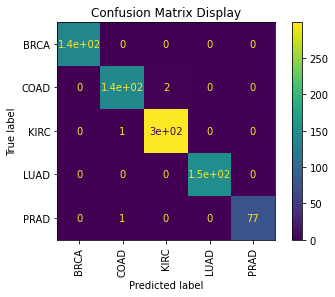

Normalized Confusion Matrix (3 decimal places):
[['1.000' '0.000' '0.000' '0.000' '0.000']
 ['0.000' '0.986' '0.014' '0.000' '0.000']
 ['0.000' '0.003' '0.997' '0.000' '0.000']
 ['0.000' '0.000' '0.000' '1.000' '0.000']
 ['0.000' '0.013' '0.000' '0.000' '0.987']]


In [15]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here
# after much experimentation, here are list of combinations allowed from the scikit-learn
# for example, ward linkage can only accept euclidean distance metrics
from sklearn.metrics import ConfusionMatrixDisplay
options = [
    # Ward (only works with Euclidean)
    ('ward', 'euclidean'),
    
    # Complete linkage
    ('complete', 'euclidean'), ('complete', 'manhattan'),
    ('complete', 'cosine'),('complete', 'l1'), ('complete', 'l2'), ('complete', 'correlation'),
    
    # Average linkage
    ('average', 'euclidean'), ('average', 'manhattan'), ('average', 'cosine'),
    ('average', 'l1'), ('average', 'l2'), ('average', 'correlation'),
    
    # Single linkage
    ('single', 'euclidean'), ('single', 'manhattan'), ('single', 'cosine'),
    ('single', 'l1'), ('single', 'l2'), ('single', 'correlation'),
]

best_linkage_method = None
best_distance_metric = None
best_accuracy = -1
best_predicted_labels_order = None

for linkage_method, distance_metric in options:
        
        model = AgglomerativeClustering(n_clusters=5, linkage=linkage_method, affinity=distance_metric)
        model.fit(data)
        labelorder, accuracy = label_permute_compare(label, model.labels_)
        print(f"linkage:{linkage_method}, \tmetric:{distance_metric}, \taccuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_linkage_method = linkage_method
            best_distance_metric = distance_metric
            best_accuracy = accuracy
            best_predicted_labels_order = np.array([labelorder[label] for label in model.labels_])
        
print("---------------")
print(f" Best AgglomerativeClustering linkage:{best_linkage_method}, metric:{best_distance_metric}, accuracy: {best_accuracy}")        
label_mapping = {label: i for i, label in enumerate(label['Class'].unique())}
true_labels_order = label['Class'].map(label_mapping).to_numpy()

cm = confusion_matrix(true_labels_order, best_predicted_labels_order)
class_names = sorted(label['Class'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix Display')
plt.show()

cm = confusion_matrix(true_labels_order, best_predicted_labels_order)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_formatted = np.array([["{:.3f}".format(val) for val in row] for row in cm_normalized])
print("Normalized Confusion Matrix (3 decimal places):")
print(cm_formatted)


### C. What about k-means clustering?
Can we apply kmeans clustering on this data? Which clustering methods give a better performance? Is kmeans faster or slower?

KMeans clustering accuracy: 0.9925093632958801


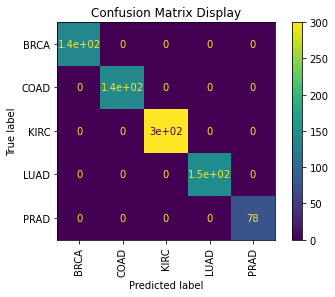

In [32]:
# try to apply kmeans clustering on this data
# time kmeans to compare to hierarchical clustering 
# your code here
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn
# print(sklearn.__version__)  
model = KMeans(n_clusters=5, init="k-means++").fit(data)
kmean_labelorder, kmean_accuracy = label_permute_compare(label, model.labels_)
print(f"KMeans clustering accuracy: {kmean_accuracy}")        


predicted_labels_order = np.array([kmean_labelorder[label] for label in model.labels_])
label_mapping = {label: i for i, label in enumerate(label['Class'].unique())}
true_labels_order = label['Class'].map(label_mapping).to_numpy()

cm = confusion_matrix(true_labels_order, true_labels_order)
class_names = sorted(label['Class'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)

disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title('Confusion Matrix Display')
plt.show()
